# Install the gmaps Dependency in our PythonData development environment using pip.      6.5.1

First, make sure you have enabled "ipywidgets" widgets extension with the following command.
$ jupyter nbextension enable --py --sys-prefix widgetsnbextension

Install gmaps with the following command:
$ pip install gmaps

Tell Jupyter to load the widgetsnbextension by running the following command:
$ jupyter nbextension enable --py --sys-prefix gmaps

# Create Heatmaps for Weather Parameters  6.5.2

In [1]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests

# Import the API key.
import sys
sys.path.append("C:\\Users\\c-hol\\Desktop\\Bootcamp")
from api_keys import G_key

# Configure gmaps to use your Google API key.
gmaps.configure(api_key=G_key)

In [2]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Ushuaia,AR,2021-12-28 01:47:43,-54.8000,-68.3000,42.46,81,40,13.80
1,1,Upernavik,GL,2021-12-28 01:47:43,72.7868,-56.1549,-5.15,77,78,5.26
2,2,Rikitea,PF,2021-12-28 01:47:44,-23.1203,-134.9692,76.60,84,100,24.67
3,3,Cape Town,ZA,2021-12-28 01:47:44,-33.9258,18.4232,63.12,95,75,13.80
4,4,Sangar,RU,2021-12-28 01:47:44,63.9242,127.4739,-53.99,99,58,2.19


One caveat to using gmaps: The data we use for any mapping must be either an integer or a floating-point decimal number. Let's check the data types for the columns of our DataFrame.

In [3]:
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

1. Assign the locations to an array of latitude and longitude pairs.
locations = [latitude, longitude]

2. Assign the weights variable to some values.
temperatures = # an array of length equal to the locations array length

3. Assign the figure variable to the gmaps.figure() attribute.
fig = gmaps.figure()

4. Assign the heatmap_layer variable to the heatmap_layer attribute and add in the locations.
heatmap_layer = gmaps.heatmap_layer(locations, weights=temperatures)

5. Add the heatmap layer.
fig.add_layer(heatmap_layer)

6. Call the figure to plot the data.
fig

#### Google heatmaps do not plot negative numbers. 
If you have a maximum temperature that is less than 0 °F, then you will get an InvalidWeightException error for this line of code:
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)

To remove the negative temperatures we can use a for loop to iterate through the max_temp and add the temperatures that are greater than 0 °F to a new list.

1. Add "Get the maximum temperature" above the "Heatmap of temperature" code block:

In the for loop, we're using the max() function to get the largest value between the temp and 0. If the temp is less than 0, then 0 will be added to the list in its place. Otherwise, the temp is added to the list.

2. Now change "max_temp" to "temps" in the following code in "Heatmap of temperature":
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)

In [4]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [5]:
# Heatmap of temperature

# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]

# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]

# Assign the figure variable.
fig = gmaps.figure()

# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=temps)

# Add the heatmap layer.
fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

### Instead of using the for loop, we can perform a list comprehension within the heatmap_layer() function.
1. REMOVE: Get the maximum temperature.
2. CHANGE Heatmap of temperature code line to:
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp])

In [6]:
# Heatmap of temperature

# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]

# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]

# Assign the figure variable.
fig = gmaps.figure()

# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp])

# Add the heatmap layer.
fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

## Adjust Heatmap Zoom, Intensity, and Point Radius
1. add the geographic center of Earth in the form of latitude and longitude (30.0° N and 31.0° E). 
2. add a zoom level so that only one map of Earth is shown.
3. dissipation option for creating heatmaps that can be added to the gmaps.heat_layer() attribute.
The options for this are:
The default option for the dissipation is "True," so we need to set our "dissipation" to "False."
We can add max_intensity to make each measurement have a better gradient variance.
We can add point_radius to make each measurement radius larger.

In [7]:
# Heatmap of Temperature

# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]

# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]

# Assign the figure variable.
fig = gmaps.figure()

# Assign the heatmap variable.
# Adjust Heatmap Zoom, Intensity, and Point Radius
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], 
                                 dissipating=False, max_intensity=300, point_radius=4)

# Add the heatmap layer.
fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [8]:
# Heatmap of Humidity

# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]

# Get the maximum temperature.
humidity = city_data_df["Humidity"]

# Assign the figure variable.
fig = gmaps.figure()

# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, 
                                 dissipating=False, max_intensity=300, point_radius=4)

# Add the heatmap layer.
fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [9]:
# Heatmap of Cloudiness

# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]

# Get the % Cloudiness.
clouds = city_data_df["Cloudiness"]

# Assign the figure variable.
fig = gmaps.figure()

# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, 
                                 dissipating=False, max_intensity=300, point_radius=4)

# Add the heatmap layer.
fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [10]:
# Heatmap of Wind Speed

# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]

# Get the maximum temperature.
wind = city_data_df["Wind Speed"]

# Assign the figure variable.
fig = gmaps.figure()

# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=wind, 
                                 dissipating=False, max_intensity=300, point_radius=4)

# Add the heatmap layer.
fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

# Add a feature on the app that allows customers to search for locations they want to travel based on their temperature preferences.   6.5.3
Recall that you use the input() statement to prompt a user to enter information. To convert the input to a floating-point decimal number, wrap the input() statement with the float() method, like this: float(input()).

In a new cell, we'll write two input statements for the app that will prompt the customer to add minimum and maximum temperature values and convert these values to floating-point decimals.

The statement can be whatever you want it to be, but for our app, we'll prompt the customer with the following two input statements.

In [11]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 80
What is the maximum temperature you would like for your trip? 100


Next, filter the maximum temperature column in the city_data_df DataFrame using logical operators to create a new DataFrame with the cities that meet the customer's criteria.

Recall that you use the loc[] method on the current DataFrame to create a new DataFrame from a current DataFrame. Inside the brackets, add the conditional filter.

In [12]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

# The preferred_cities_df DataFrame will contain all the cities that meet the temperature criteria.

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
16,16,Georgetown,MY,2021-12-28 01:47:47,5.4112,100.3354,82.33,79,20,3.00
24,24,Padang,ID,2021-12-28 01:47:51,-0.9492,100.3543,84.25,69,100,0.76
27,27,Kapaa,US,2021-12-28 01:46:55,22.0752,-159.3190,82.38,72,40,1.01
33,33,Vaini,TO,2021-12-28 01:47:53,-21.2000,-175.2000,84.36,84,75,3.44
42,42,Simbahan,PH,2021-12-28 01:47:56,6.3032,120.5836,80.13,78,100,7.81
43,43,Busselton,AU,2021-12-28 01:47:57,-33.6500,115.3333,94.05,32,5,7.96
48,48,Kavieng,PG,2021-12-28 01:48:59,-2.5744,150.7967,84.13,71,86,4.25
50,50,Bandar,ID,2021-12-28 01:47:06,2.0500,99.7500,80.53,76,19,0.63
53,53,Butaritari,KI,2021-12-28 01:49:01,3.0707,172.7902,82.04,77,81,10.94
54,54,Port-Gentil,GA,2021-12-28 01:49:01,-0.7193,8.7815,80.04,82,100,12.39


### Determine if the preferred_cities_df DataFrame has any null values for any of the rows.
Use one of the following:
preferred_cities_df.count()
preferred_cities_df.isnull().sum()
preferred_cities_df.notnull().sum()

In [13]:
preferred_cities_df.count()

City_ID       56
City          56
Country       56
Date          56
Lat           56
Lng           56
Max Temp      56
Humidity      56
Cloudiness    56
Wind Speed    56
dtype: int64

Consider the following guidance:

1. Depending on the time of year and the seasons, you might have to adjust the minimum and maximum temperature to get enough cities.
2. It is a good idea to keep the number of cities to fewer than 200 to make it easier to plot the markers on the heatmap.
3. If you have some rows with null values, you'll need to drop them using the dropna() method at the end of your filtering statement when you are creating the new DataFrame.

# Find a hotel to stay in the city.  6.5.4
Using the coordinates from the preferred_cities_df DataFrame, find a hotel using our Google Places API and then retrieve that hotel information. Once we retrieve the hotel information, we'll need to store it so we can reference it and add the information to the pop-up marker.

Get Travel Destinations
Don't add the hotel information to the preferred_cities_df DataFrame because this DataFrame is our filtered DataFrame, and the customer will always filter it for each trip. We'll need to create a new DataFrame specifically for the data needed to create a heatmap and pop-up markers.

Make a copy of the preferred_cities_df DataFrame and name it hotel_df. For the hotel_df, keep the columns "City," "Country," "Max Temp," "Lat," and "Lng." Add a new column to the hotel_df DataFrame to hold the name of the hotel.

In [14]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
16,Georgetown,MY,82.33,5.4112,100.3354,
24,Padang,ID,84.25,-0.9492,100.3543,
27,Kapaa,US,82.38,22.0752,-159.3190,
33,Vaini,TO,84.36,-21.2000,-175.2000,
42,Simbahan,PH,80.13,6.3032,120.5836,
43,Busselton,AU,94.05,-33.6500,115.3333,
48,Kavieng,PG,84.13,-2.5744,150.7967,
50,Bandar,ID,80.53,2.0500,99.7500,
53,Butaritari,KI,82.04,3.0707,172.7902,
54,Port-Gentil,GA,80.04,-0.7193,8.7815,


## Google Places Nearby Search request

Nearby Search requests  https://developers.google.com/maps/documentation/places/web-service/search#PlaceSearchRequests%0D%0A
 
The Nearby Search request lets us perform these tasks:
1. Search for places within a specified area.
2. Refine the search using keywords and specifying the type of place we are searching for.
3. Use an API URL, where the output can be either XML or JSON format.

Although very similar to our OpenWeatherMap API search, with the Google Places Nearby Search, we'll add a specified area and keyword to search.

Specific parameters include:
1. Our API key
2. A location, which will be the latitude and longitude
3. A radius for the search. The radius can be up to 50,000 meters or approximately 31 miles. This distance is much too great for finding hotels, so we'll keep our search to 5,000 meters.
4. If we use the rankby=distance for a parameter, we need to add one or more of the three parameters above. We won't use the rankby=distance because we will be search based on the radius from a given latitude and longitude.

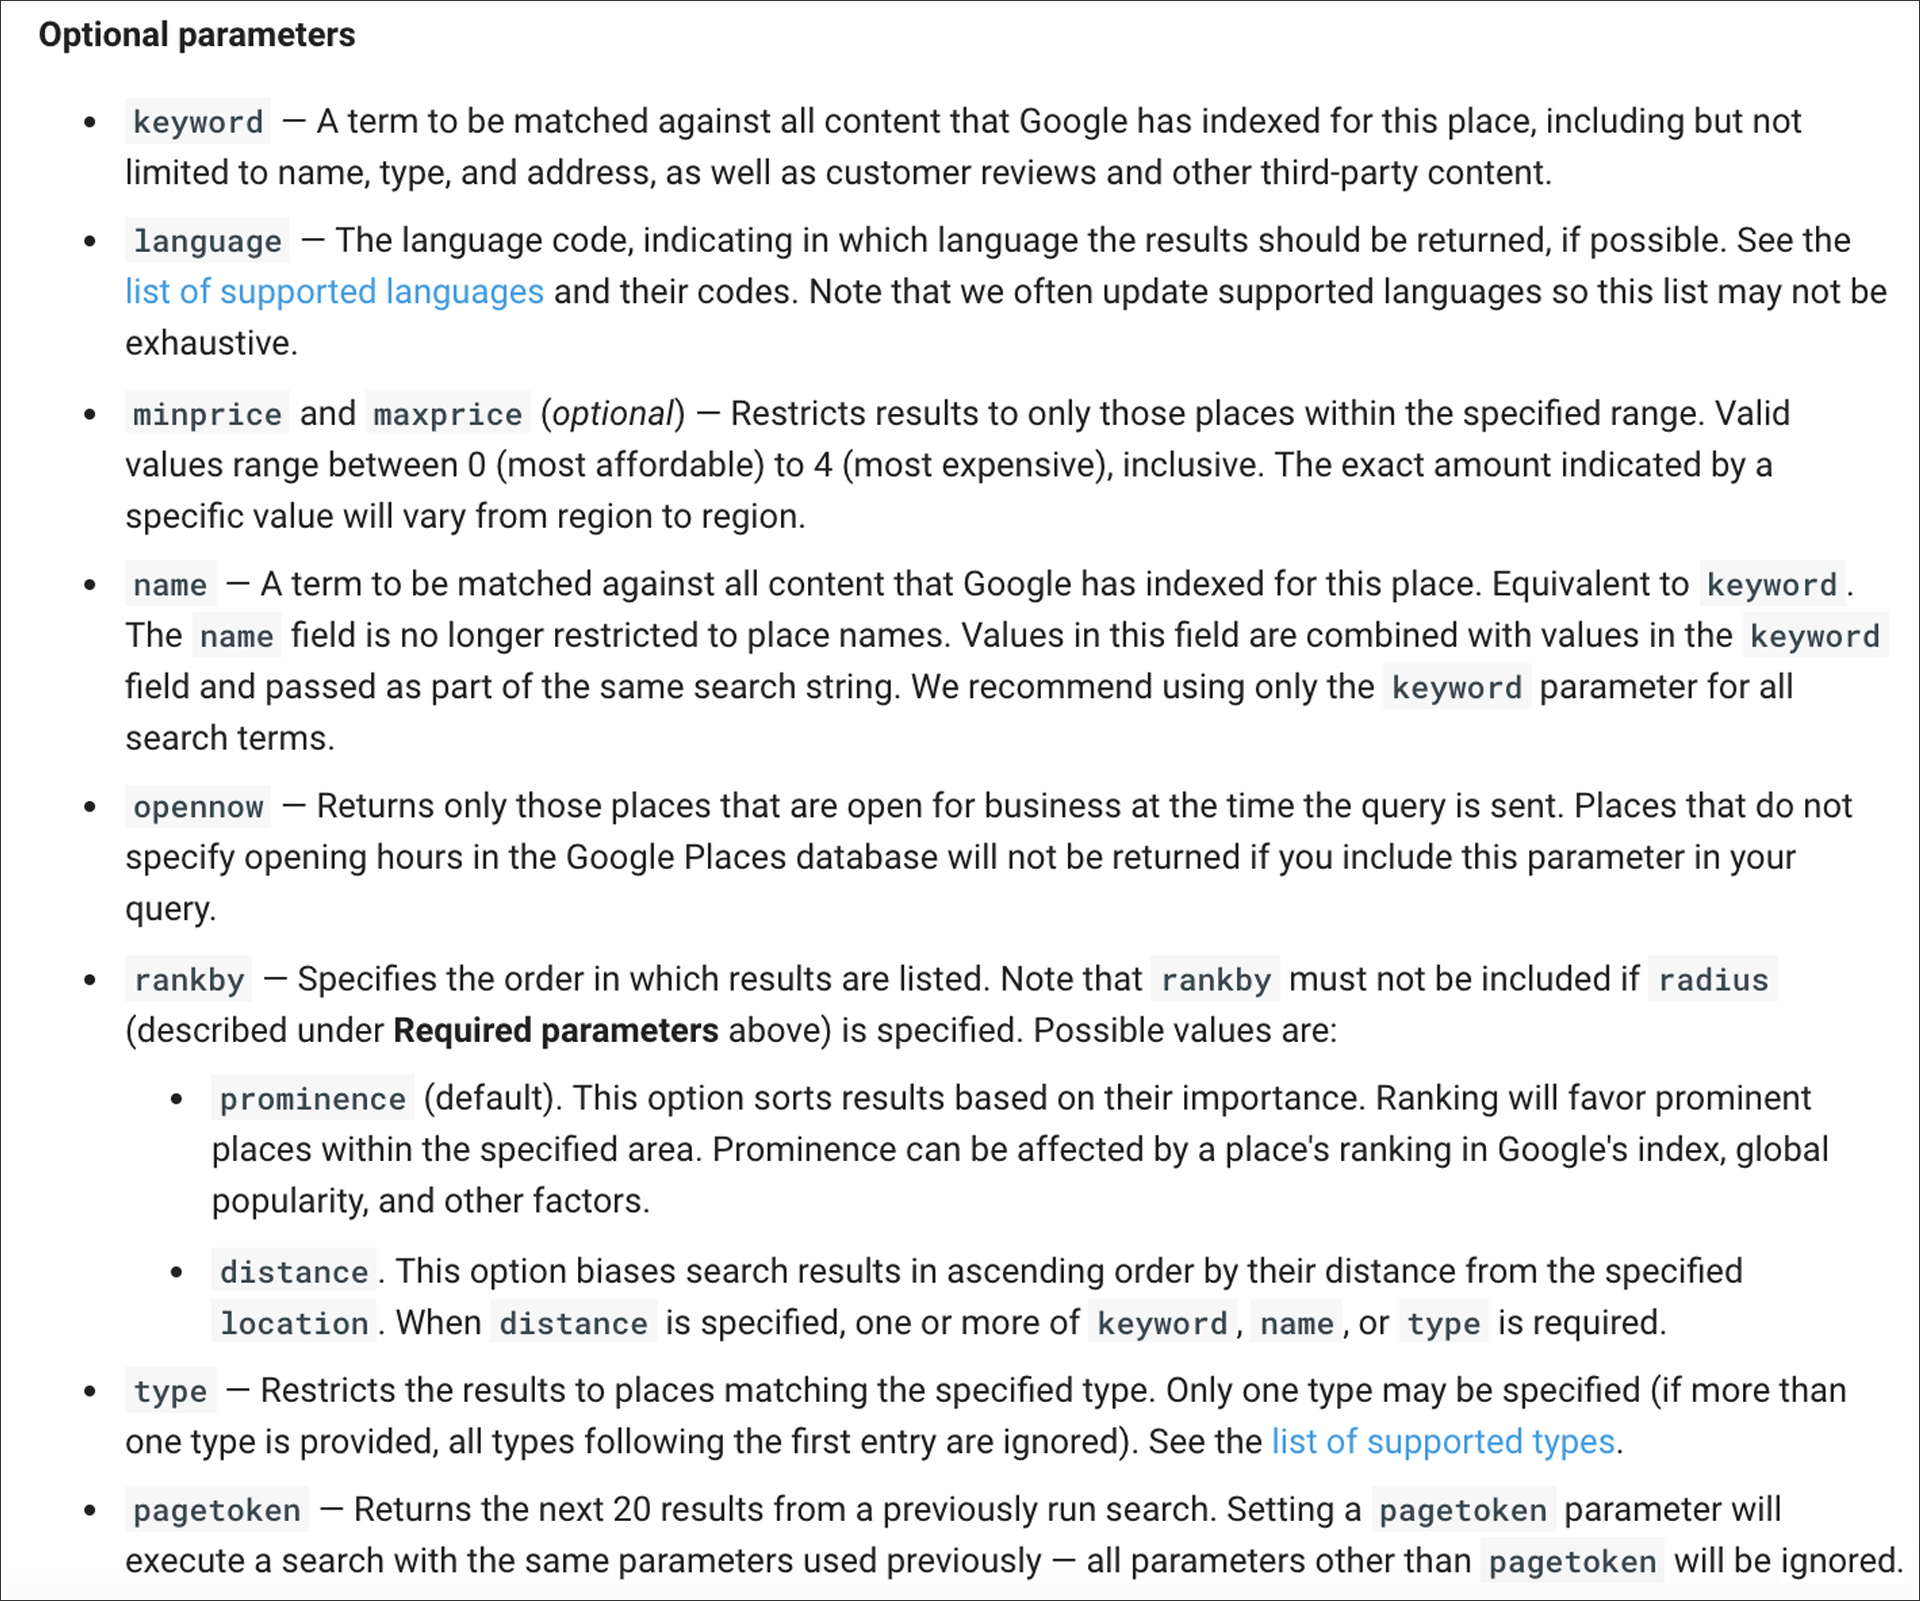

For our hotel search, we'll use these parameters:
- API key
- Latitude and longitude
- 5,000-meter radius
- Type of place

Place Types guide https://developers.google.com/maps/documentation/places/web-service/supported_types

1. On the webpage, Table 1 shows all the different Place types values. "Hotel" does not appear, but "lodging" does, so we will use the string "lodging" for the type parameter.

### BREAKOUT to 05_breakout_Google_Nearby_Search

2. Now that we know how to retrieve the hotel name from the JSON data, we can iterate over the rows in the hotel_df DataFrame for the coordinates. We can use the iterrows() function to perform the iteration; however, we need to provide the index and the row in the for loop using this syntax: for index, row in df.iterrows().

3. modified how we add the coordinates to the location key. 
4. add the latitude and longitude to the location using the f-string format. The rest of the code is the same as when we practiced, but at the end, we add the name of the first hotel to the Hotel Name column in the hotel_df DataFrame.

In [15]:
# 1. Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": G_key
}

# 2. Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    
    # 3. Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # 4. Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")

hotel_df.head(10)

Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.


,City,Country,Max Temp,Lat,Lng,Hotel Name
16,Georgetown,MY,82.33,5.4112,100.3354,Cititel Penang
24,Padang,ID,84.25,-0.9492,100.3543,Mercure Padang
27,Kapaa,US,82.38,22.0752,-159.3190,Sheraton Kauai Coconut Beach Resort
33,Vaini,TO,84.36,-21.2000,-175.2000,Keleti Beach Resort
42,Simbahan,PH,80.13,6.3032,120.5836,
43,Busselton,AU,94.05,-33.6500,115.3333,Observatory Guest House
48,Kavieng,PG,84.13,-2.5744,150.7967,Nusa Island Retreat
50,Bandar,ID,80.53,2.0500,99.7500,
53,Butaritari,KI,82.04,3.0707,172.7902,Isles Sunset Lodge
54,Port-Gentil,GA,80.04,-0.7193,8.7815,Fengshui Residence


## Create a Maximum Temperature Heatmap from a Hotel DataFrame

In [16]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

 gmaps documentation on how to add markers: https://jupyter-gmaps.readthedocs.io/en/latest/tutorial.html#markers-and-symbols

In [17]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)

fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

### Info box 
the info_box_template variable is assigned to a multiline string using three quotes. The text inside the multiline string is HTML code. HTML code is defined by the opening and closing the angular brackets (e.g., <tag> and <tag/>). Angular brackets always come in pairs. The opening angular bracket is followed by some text inside, such as dl, dt, and dd. The closing angular bracket is preceded by a forward-slash ("/"). The text inside with the angular brackets is called a tag. We'll see more examples of HTML code in an upcoming module.

Here's what these tags mean:
The <dl> tag is a description list (dl).
The <dt> tag is a term or name in a description list that is nested under the <dl> tag.
The <dd> tag is used to define the term or name or <dt> tag.

If we were to write out these tags on paper, it would look like this.
Description List: <dl>
Description Term: <dt>
Description Definition: <dd>
Description Term: <dt>
Description Definition: <dd>
------
  
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""
- For our purposes, we'll add the hotel name, city name, country code, and the maximum temperature values from the hotel_df DataFrame as the description definition:
    
    
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]
1. We set the hotel_info equal to the info_box_content.
2. In the list comprehension, info_box_template.format(**row) for index, row in hotel_df.iterrows(), we iterate through each "row" of the hotel_df DataFrame and then format the info_box_template with the data we set to populate the from each row. Remember, we are not using every row; we are only using the rows defined in the info_box_template, which are Hotel Name, City, Country, and Max Temp.
    


    

In [18]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)

fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Create the Info Box
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [19]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)

marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)

fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))